In [1]:
# general python packages:
from __future__ import division
from __future__ import print_function
import numpy as np

# custom modules:
from Chern.Computers import get_training_set_all_HSPs, get_test_set_all_HSPs
from Chern.MachineLearning import train_ANN
from Chern.Visualization import plot_curv_func, plot_test_ANN

# Create the data directory if it doesn't exist; the saving functions assume it exists
import os
os.makedirs("./data/Chern/", exist_ok=True)

## Input parameters

In [8]:
# Parameter for plotting the curvature function:
N_kx = 4                      # number of points in the k-interval
kx_left = 0                   # left bound of the interval
kx_right = 2*np.pi            # right bound of the interval
N_ky = 4                      # number of points in the k-interval
ky_left = 0                   # left bound of the interval
ky_right = 2*np.pi            # right bound of the interval
M = 1.0                       # mass term
u = 1.0                       # acoustic phonon coupling constant
vs_plot = 1.0                 # sound velocity
omega_plot = 1.0              # Matsubara frequency for the interactions


# Parameters for the training and test set generation:
M_initial_training = -6.0                 # Initial value in the probed mass term interval for the training data.
M_final_training = 2.0                   # Final value in the probed mass term interval for the training data.
M_points_training = 1024                 # Number of points in the M interval for the training data.
random_flag = False                      # Flag to generate randomly scattered points or not.

M_initial_test = -6.0                     # Initial value in the probed mass term interval for the test data
M_final_test = 2.0                         # Final value in the probed mass term interval for the test data
M_points_test = 10                        # Number of points in the M interval for the test data


vs = 1.0                      # Sound velocity
u_initial = 0.01              # Initial value in the probed coupling interval
u_final = 1.0                 # Final value in the probed coupling interval
u_points = 10                 # Number of points in the u interval


# Hyperparameters for the neural network:
width = 10                    # number of neurons in the hidden layer
epochs = 100                  # length of the training in epochs
batch_size = 8                # batch size for the training
shuffle = True                # flag for shuffling the data during training

# Flag for plotting raw data when testing:
PlotRawData = False

## Example of the curvature function

#### Warning: Due to the integration in the definition of the self-energy, this may take a long time (several hours) to compute!

/Users/paolomolignini/Dropbox/machine_learning_curvature/gitlab-repo/interacting-topological-insulators-ml/Chern/Computers.py:149: ComplexWarning: Casting complex values to real discards the imaginary part
  curv_func_array[ky_idx][kx_idx] = curv_func(M, u, vs, kx, ky, omega)


0.0 % of calculation of curvature function completed.
6.25 % of calculation of curvature function completed.
12.5 % of calculation of curvature function completed.
18.75 % of calculation of curvature function completed.
25.0 % of calculation of curvature function completed.
31.25 % of calculation of curvature function completed.
37.5 % of calculation of curvature function completed.
43.75 % of calculation of curvature function completed.
50.0 % of calculation of curvature function completed.
56.25 % of calculation of curvature function completed.
62.5 % of calculation of curvature function completed.
68.75 % of calculation of curvature function completed.
75.0 % of calculation of curvature function completed.
81.25 % of calculation of curvature function completed.
87.5 % of calculation of curvature function completed.
93.75 % of calculation of curvature function completed.


/Users/paolomolignini/Dropbox/machine_learning_curvature/gitlab-repo/interacting-topological-insulators-ml/Chern/Visualization.py:118: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Plot the surface.


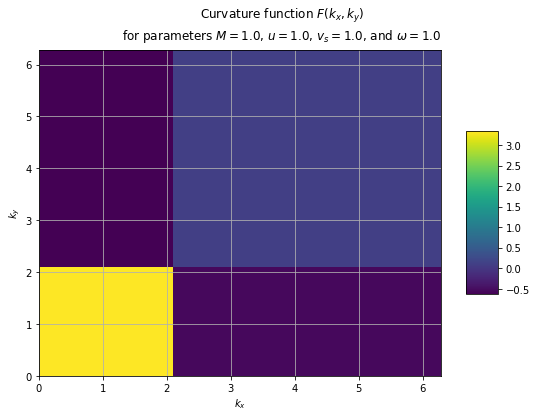

In [3]:
# Plot an example of the curvature function to show how it behaves:
plot_curv_func(M, u, vs_plot, kx_left, kx_right, N_kx, ky_left, ky_right, N_ky, omega_plot, vmin="None", vmax="None", load=False)

## Generate training data and save it to a file

In [3]:
curv_func_array_train = get_training_set_all_HSPs(M_initial_training, M_final_training, M_points_training, random_flag = random_flag)

0.0 % of calculation of curvature function completed.
0.03255208333333333 % of calculation of curvature function completed.
0.06510416666666666 % of calculation of curvature function completed.
6.25 % of calculation of curvature function completed.
6.282552083333333 % of calculation of curvature function completed.
6.315104166666667 % of calculation of curvature function completed.
12.5 % of calculation of curvature function completed.
12.532552083333334 % of calculation of curvature function completed.
12.565104166666666 % of calculation of curvature function completed.
18.75 % of calculation of curvature function completed.
18.782552083333336 % of calculation of curvature function completed.
18.815104166666664 % of calculation of curvature function completed.
25.0 % of calculation of curvature function completed.
25.032552083333332 % of calculation of curvature function completed.
25.065104166666668 % of calculation of curvature function completed.
31.25 % of calculation of curvature

## Preprocess data, define the neural network, and train it with the noninteracting data:

In [4]:
train_ANN(M_initial_training, M_final_training, M_points_training, width, epochs, batch_size, random_flag=True, shuffle=True, load=False)

0.0 % of calculation of curvature function completed.
0.03255208333333333 % of calculation of curvature function completed.
0.06510416666666666 % of calculation of curvature function completed.
6.25 % of calculation of curvature function completed.
6.282552083333333 % of calculation of curvature function completed.
6.315104166666667 % of calculation of curvature function completed.
12.5 % of calculation of curvature function completed.
12.532552083333334 % of calculation of curvature function completed.
12.565104166666666 % of calculation of curvature function completed.
18.75 % of calculation of curvature function completed.
18.782552083333336 % of calculation of curvature function completed.
18.815104166666664 % of calculation of curvature function completed.
25.0 % of calculation of curvature function completed.
25.032552083333332 % of calculation of curvature function completed.
25.065104166666668 % of calculation of curvature function completed.
31.25 % of calculation of curvature

[[-3.79496127e-03  1.19622746e-02 -2.37194629e-01]
 [-1.55021357e-02  1.12735311e+00  2.64565723e-02]
 [-3.76783815e-03  1.18111119e-02 -2.24272975e-01]
 [-3.25361442e-02 -4.18446375e-01  1.34092295e-02]
 [-2.73693170e-02 -9.15363605e-01  1.51106195e-02]
 [-2.28524200e-03  5.22911371e-03 -2.20193794e-02]
 [-3.61902169e-03  1.10037680e-02 -1.67528931e-01]
 [-6.05077454e-03  3.00797017e-02  5.70487109e-01]
 [-2.16201613e-02 -1.19854353e+01  1.83672573e-02]
 [ 5.23129696e-01 -1.39311164e-02  4.12911060e-03]
 [ 2.02341007e-02 -5.01578892e-03  2.22296169e-03]
 [-8.60347329e-03  7.33913427e-02  8.65800222e-02]
 [ 1.14312542e+01 -1.83328606e-02  4.77242210e-03]
 [ 2.82457593e-02 -5.88100118e-03  2.46788315e-03]
 [ 2.64713676e+02 -1.95538672e-02  4.93075385e-03]
 [-2.35794256e-03  5.48385030e-03 -2.43074326e-02]
 [-3.71353933e-03  1.15122473e-02 -2.01041016e-01]
 [-3.98034006e-03  1.30297165e-02 -3.58239166e-01]
 [-1.41038086e-02  5.64841662e-01  3.01486818e-02]
 [-1.00668295e-02  1.20820178e-

Epoch 1/100
128/128 [==============================] - 1s 1ms/step - loss: 1.1327 - accuracy: 0.3623
Epoch 2/100
128/128 [==============================] - 0s 1ms/step - loss: 0.9901 - accuracy: 0.5537
Epoch 3/100
128/128 [==============================] - 0s 1ms/step - loss: 0.9546 - accuracy: 0.5557
Epoch 4/100
128/128 [==============================] - 0s 1ms/step - loss: 0.9308 - accuracy: 0.5576
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.9080 - accuracy: 0.5811
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.8854 - accuracy: 0.5938
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.8614 - accuracy: 0.6074
Epoch 8/100
128/128 [==============================] - 0s 3ms/step - loss: 0.8376 - accuracy: 0.6182
Epoch 9/100
128/128 [==============================] - 0s 2ms/step - loss: 0.8141 - accuracy: 0.6221
Epoch 10/100
128/128 [==============================] - 0s 3ms/step - loss: 0.7915 - accura

128/128 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 1.0000
Epoch 82/100
128/128 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 1.0000
Epoch 83/100
128/128 [==============================] - 0s 1ms/step - loss: 0.0204 - accuracy: 1.0000
Epoch 84/100
128/128 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 1.0000
Epoch 85/100
128/128 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 1.0000
Epoch 86/100
128/128 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 87/100
128/128 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 88/100
128/128 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 1.0000: 0s - loss: 0.0151 - accuracy: 1.00
Epoch 89/100
128/128 [==============================] - 0s 1ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 90/100
128/128 [==============================] - 0s 

## Generate test set

#### Warning:  due to the integration in the definition of the self-energies, this may take a while (several hours) to compute!

In [6]:
curv_func_array_test = get_test_set_all_HSPs(M_initial_test, M_final_test, M_points_test, vs, u_initial, u_final, u_points)

The curvature function is: -0.05817925535923659
The curvature function is: 0.1963566814229215
The curvature function is: -1.570887686340903
0.0 % of calculation of curvature function completed.
The curvature function is: -0.05841050228081811
The curvature function is: 0.1973808384614674
The curvature function is: -1.5840208600095473
1.0 % of calculation of curvature function completed.
The curvature function is: -0.05903803969918245
The curvature function is: 0.20016860144501716
The curvature function is: -1.6200689493326548
2.0 % of calculation of curvature function completed.
The curvature function is: -0.060075682395610626
The curvature function is: 0.20480540831418048
The curvature function is: -1.6810039307928022
3.0 % of calculation of curvature function completed.
The curvature function is: -0.06154658184641674
The curvature function is: 0.21143620257661028
The curvature function is: -1.7702894275467838
4.0 % of calculation of curvature function completed.
The curvature function

The curvature function is: -3.1330927984847414
The curvature function is: -208.04724168559568
The curvature function is: 0.9672374448379446
The curvature function is: -3.05062008850273
The curvature function is: -246.70034720332782
The curvature function is: 1.0166064221174487
The curvature function is: -2.9577673534117954
The curvature function is: -304.07251919589464
The curvature function is: 1.0774683024480167
The curvature function is: -2.8563126684281923
The curvature function is: -391.7397082492139
The curvature function is: 1.1512997689474886
The curvature function is: -2.748065621058268
The curvature function is: -531.7599347451612
The curvature function is: 1.2399396158525648
The curvature function is: -42.40518108838942
The curvature function is: -5.301848298744335
The curvature function is: 0.33931053799367783
The curvature function is: -41.51471413772699
The curvature function is: -5.360975452955341
The curvature function is: 0.3419704606420199
The curvature function is: -

## Test the neural network with interacting data (prediction of the full phase diagram) and visualize the results:

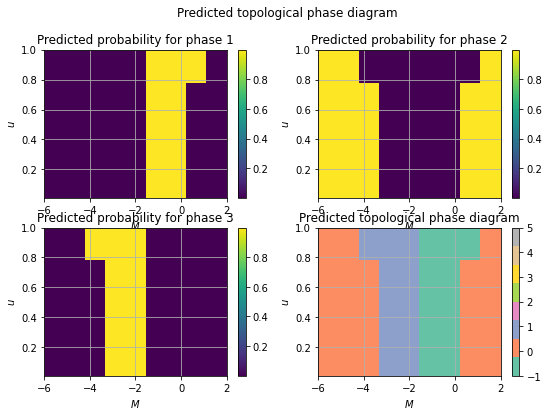

In [9]:
plot_test_ANN(M_initial_training, M_final_training, M_points_training, random_flag, M_initial_test, M_final_test, M_points_test, vs, u_initial, u_final, u_points, N_kx, N_ky, load=True, PlotRawData=PlotRawData)